# Voronoi tesselation
Voronoi-tesselation is the process of subdividing an area accoding to a [Voronoi-diagram](https://en.wikipedia.org/wiki/Voronoi_diagram). In bio-imaging this method can be used to estimate where cells touch each other in case imaging data does not allwo this, e.g. if no membrane marker was used.

In [1]:
from skimage.io import imread
import pyclesperanto_prototype as cle

To demonstrate tesselation, we first load an image showing some objects.

cl.OCLArray([[ 40.,  32.,  24., ..., 216., 200., 200.],
       [ 56.,  40.,  24., ..., 232., 216., 216.],
       [ 64.,  48.,  24., ..., 240., 232., 232.],
       ...,
       [ 72.,  80.,  80., ...,  48.,  48.,  48.],
       [ 80.,  80.,  80., ...,  48.,  48.,  48.],
       [ 96.,  88.,  80., ...,  48.,  48.,  48.]], dtype=float32)
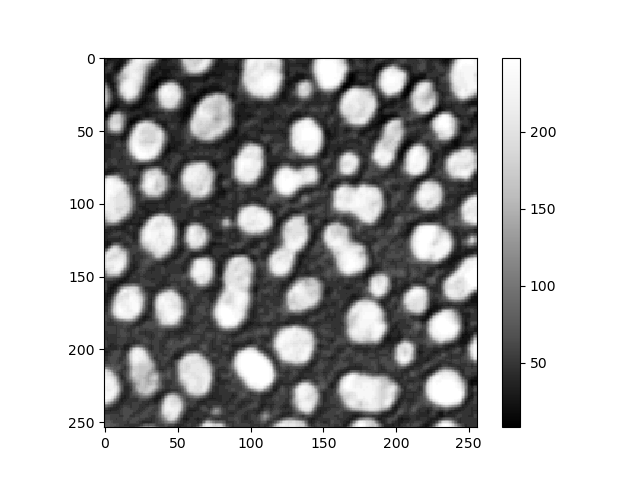
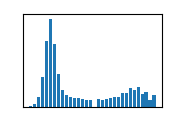

In [2]:
image = imread("../../data/blobs.tif")
cle.asarray(image)

We also segment the nuclei in this image and label them.

cl.OCLArray([[ 0,  0,  0, ..., 61, 61, 61],
       [ 0,  0,  0, ..., 61, 61, 61],
       [ 0,  0,  0, ..., 61, 61, 61],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint32)
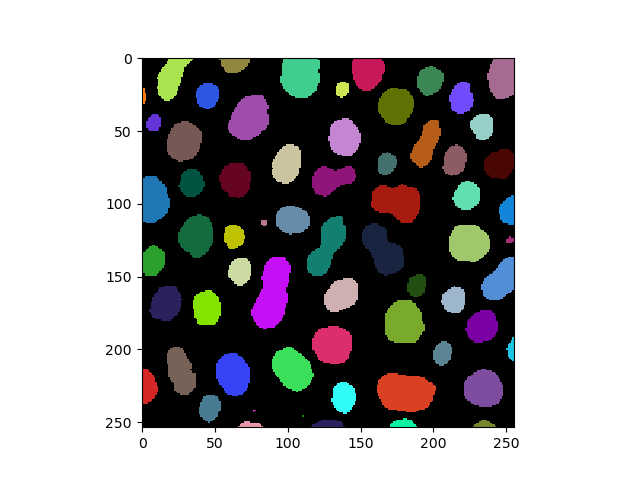

In [3]:
#background_subtracted = cle.top_hat_sphere(image, radius_x=50, radius_y=50)
binary = cle.threshold_otsu(image)
labels = cle.connected_components_labeling_box(binary)
labels

By dilating the labels, we fill up the space between them. We could do this in a loop:

Radius: 0


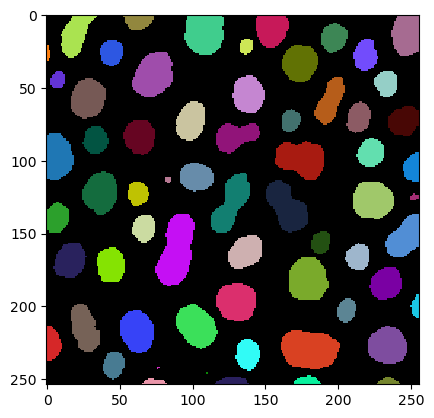

Radius: 2


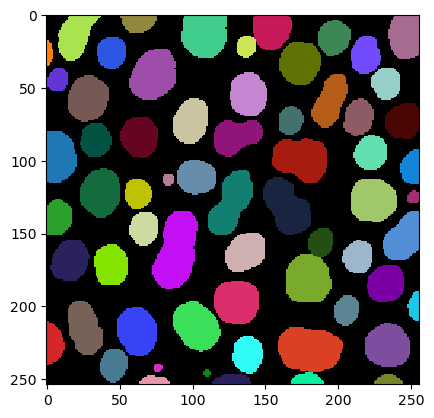

Radius: 4


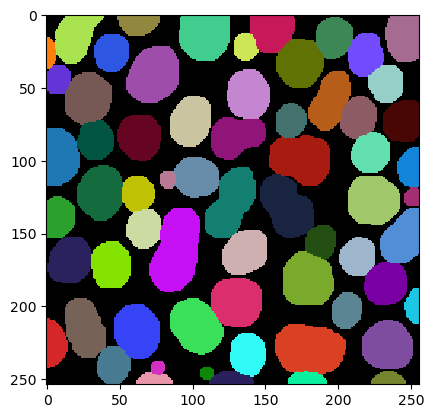

Radius: 6


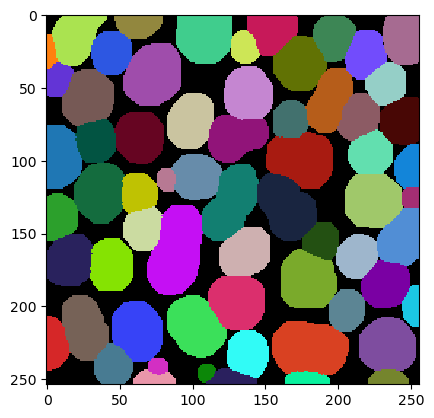

Radius: 8


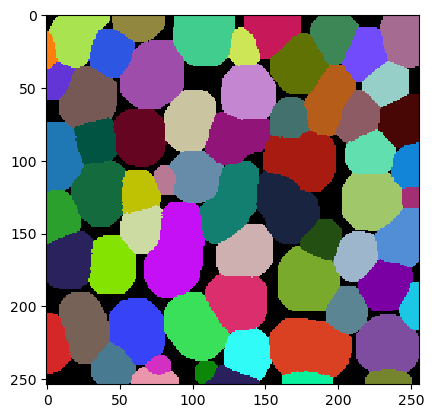

In [4]:
for radius in range(0, 10, 2):
    dilated_labels = cle.dilate_labels(labels, radius=radius)
    
    print("Radius:", radius)
    cle.imshow(dilated_labels, labels=True)

We can also do this with a single function call and fill up background intensity until its gone. This process is called Voronoi-Tesselation. The result is a Voronoi-label-image. You can also see it as a discrete Voronoi-diagram.

cl.OCLArray([[ 7,  7,  7, ..., 61, 61, 61],
       [ 7,  7,  7, ..., 61, 61, 61],
       [ 7,  7,  7, ..., 61, 61, 61],
       ...,
       [ 4,  4,  4, ..., 58, 58, 58],
       [ 4,  4,  4, ..., 58, 58, 58],
       [ 4,  4,  4, ..., 58, 58, 58]], dtype=uint32)
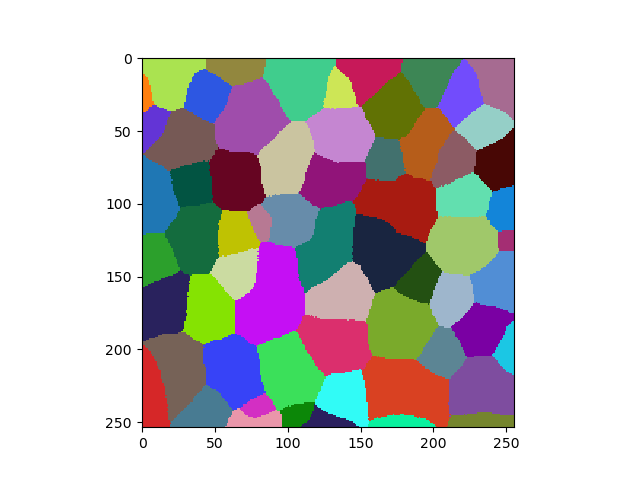

In [5]:
voronoi_label_image = cle.voronoi_labeling(labels)
voronoi_label_image

An common alternative visualization is the corresponding label-edge-image.

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
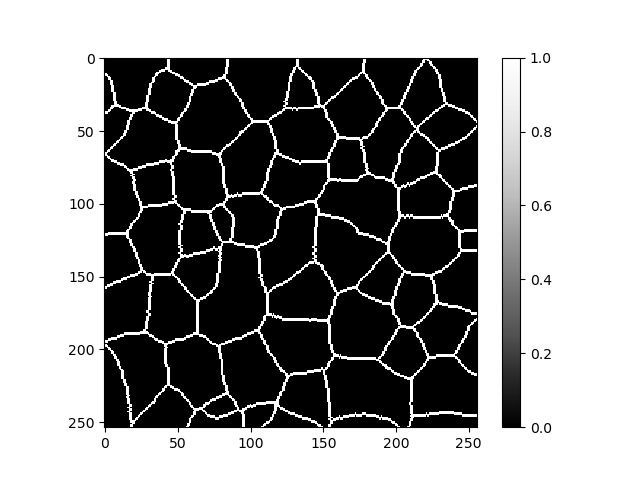
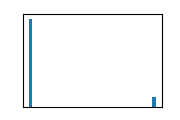

In [6]:
label_edges = cle.detect_label_edges(voronoi_label_image)
label_edges

## Voronoi and Delauney diagrams
There is a close relationship with the [Delauney triangulation](https://en.wikipedia.org/wiki/Delaunay_triangulation). Voronoi and Delauney diagrams are dual graphs. In the continuous case, you can compute the one from the other and vice-versa. In the discrete case, one can determine an estimation of the Delauney graph from a Voronoi-label-image by determining the label's centroids and connecting them:

cl.OCLArray([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
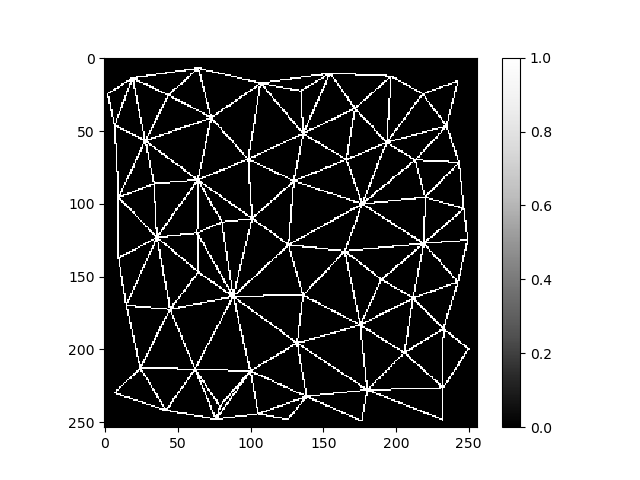
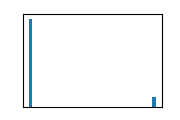

In [7]:
touching_neighbor_mesh = cle.draw_mesh_between_touching_labels(voronoi_label_image)
touching_neighbor_mesh

By visualizing the label-edge-image and neighbor-mesh in the same image, their relationship becomes more obvious.

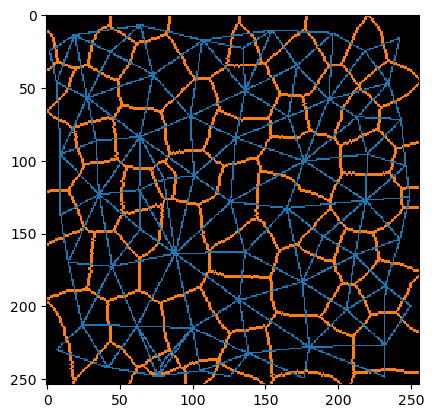

In [8]:
sum_image = cle.maximum_images(touching_neighbor_mesh * 2, label_edges)
cle.imshow(sum_image, labels=True)

## Exercise
Visualize the neighbor-mesh and the label-edges of this `label_image` together as shown above:

cl.OCLArray([[ 1,  1,  1, ...,  9,  9,  9],
       [ 1,  1,  1, ...,  9,  9,  9],
       [ 1,  1,  1, ...,  9,  9,  9],
       ...,
       [52, 52, 52, ..., 60, 60, 60],
       [52, 52, 52, ..., 60, 60, 60],
       [52, 52, 52, ..., 60, 60, 60]], dtype=uint32)
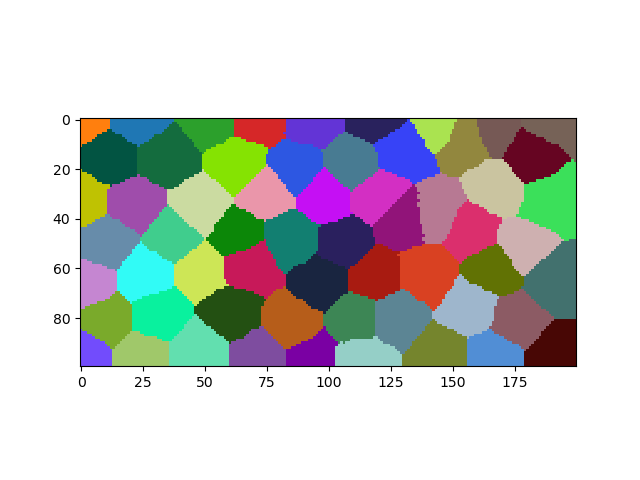

In [9]:
label_image = cle.artificial_tissue_2d(width=200, height=100)
label_image